In [1]:
from IPython.core.display import HTML, Image
css_file = 'style.css'
HTML(open(css_file, 'r').read())

In [5]:
from sympy import init_printing, Matrix, symbols
init_printing()

# Solving $A\underline{x}=\underline{b}$

## Finding the complete solution to the set for in a linear system

In this section, we focus on the row view of matrices in order to solve systems of linear equations.  Our aim to to find possible solutions for $\underline{x}$.  Consider the example in (1), taken from the previous lecture.

$$\begin{align}&{x_1}+2{x}_{2}+2{x}_{3}+2{x}_{4}={b}_{1}\\&2{x}_{1}+4{x}_{2}+6{x}_{3}+8{x}_{4}={b}_{2}\\&3{x_1}+6{x}_{2}+8{x}_{3}+10{x}_{4}={b}_{3}\end{align}\tag{1}$$

The matrix of coefficients and vectors are shown in (2).

$$\begin{bmatrix}1&2&2&2\\2&4&6&8\\3&6&8&10\end{bmatrix}\begin{bmatrix}{x}_{1}\\{x}_{2}\\{x}_{3}\\{x}_{4}\end{bmatrix}=\begin{bmatrix}{b}_{1}\\{b}_{2}\\{b}_{3}\end{bmatrix}\tag{2}$$

Multiplying the matrix of coefficients and the column vector of unknowns is shown in (3), indication that we are adding scalar multiples of vectors.

$${x}_{1}\begin{bmatrix}1\\2\\3\end{bmatrix}+{x}_{2}\begin{bmatrix}2\\4\\6\end{bmatrix}+{x}_{3}\begin{bmatrix}2\\6\\8\end{bmatrix}+{x}_{4}\begin{bmatrix}2\\8\\10\end{bmatrix}=\begin{bmatrix}{b}_{1}\\{b}_{2}\\{b}_{3}\end{bmatrix}\tag{4}$$

Since the third row is the addition of ($1\times$) row one and ($1\times$) row two, solutions on the right-hand side must be of the form shown in (5).

$${b}_{3}={b}_{1}+{b}_{2}\tag{5}$$

The question now is: _What values can $\underline{x}$ possibly take?_

From what we have seen up until now, $A\underline{x}=\underline{b}$ is solvable (exactly) when $\underline{b}$ is in the column space of $A$, that is to say, it must be a linear combination of the columns.

We need to find two solutions, one called the _particular_ and one the _nullspace_ solution.

### The particular solution: $\underline{x}_\text{particular}$

A particular solution is one that solves a specific case for $\underline{b}$.  Consider the reduced row-echelon form of the matrix of coefficients, $A$.

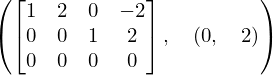

In [12]:
A.rref()

Note that columns $2$ and $4$ have zero values as their respective pivots.

To find $\underline{x}_\text{particular}$ or $\underline{x}_\text{p}$, we set all free variables to $0$ (in this example case that would be ${x_2}={x_4}=0$, since these are _columns without pivots_).  Then we solve $A\underline{x}=\underline{b}$ for the pivot variables.

Let's see that in action and calculate $\underline{x}_\text{p}$ for (6).

$$\underline{b} =\begin{bmatrix}1\\5\\6\end{bmatrix}\tag{6}$$

The equation (6) above is a proper solution as $1+5=6$ in accordance with (5).

Below, we create an augmented matrix (that is one with $\underline{b}$ included).

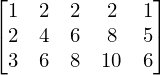

In [10]:
A_augm = Matrix([[1, 2, 2, 2, 1], [2, 4, 6, 8, 5], [3, 6, 8, 10, 6]])
A_augm

We can reduce this to reduced row-echelon form using the `.rref()` method.

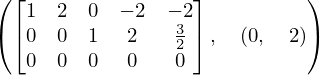

In [13]:
A_augm.rref() # The video example is not solved to reduced row echelon form

So, we are left with a new matrix (called `A1` below) that omits columns $2$ and $4$.

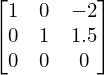

In [14]:
A1 = Matrix([[1, 0, -2] ,[0, 1, (3 / 2)] ,[0, 0, 0]]) # The video example is not solved to reduced row echelon form
A1

From the last row in the reduced row-echelon form, we note that we can set $x_4$ to any value.  We have already set is to $0$, though.  From the second last row, we can read that $1{x_3}+{x_4}=\frac{3}{2}$, or then, ${x_3}=\frac{3}{2}$.  Knowing that ${x_2}=0$, we read from the first row that $1{x_1}+2{x_2}+0{x_3}-2{x_4}={x_1}=-2$ as shown in (7).

$$\begin{align}&x_4=0\\&{x_3}=\frac{3}{2}\\&{x_1}=-2\end{align}\tag{7}$$

Thus, for $\underline{x}_\text{p}$ we have (8).

$$\underline{x}_\text{p}=\begin{bmatrix}-2\\0\\{\frac{3}{2}}\\0\end{bmatrix}\tag{8}$$

### The nullspace solution: $\underline{x}_\text{nullspace}$

Here we have $\underline{b}$ as in (9).  (We will simplify the notation to $\underline{x}_\text{n}$.)

$$\underline{b}=\begin{bmatrix}0\\0\\0\end{bmatrix}\tag{9}$$

Reduction to reduce row-echelon form and following the same principles as above leads us to two nullspace solutions that we can easily calculate using the `.nullspace()` method for the augmented matrix.

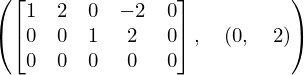

In [16]:
A_augmented_null = Matrix([[1, 2, 2, 2, 0], [2, 4, 6, 8, 0], [3, 6, 8, 10, 0]])
A_augmented_null.rref()

In [8]:
A.nullspace()

⎡⎡-2⎤, ⎡2 ⎤⎤
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢0 ⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎢⎢0 ⎥  ⎢-2⎥⎥
⎢⎢  ⎥  ⎢  ⎥⎥
⎣⎣0 ⎦  ⎣1 ⎦⎦

Let's have a look at how we got here.  We begin with the last row of the reduced row-echelon form.  Since we are free to set a value for $x_4$ (the whole row consisting of zeros), we set it to $t$.  Solving back up through rows $2$ and $1$, we have (10) below.

$$\begin{align}&{x_4}=t\\&{x_3}+2t=0\\&{x_3}=-2t\\&{x_1}+2{x_2}-2t=0\\&{x_1}=2t-2{x_2}\end{align}\tag{10}$$

The simplest value to give $t$ is $0$ and with ${x_2}=1$, we have (11).

$$\begin{align}&{x_4}=0\\&{x_3}=0\\&{x_2}=1\\&{x_1}=-2\end{align}\tag{11}$$

If we set $t=1$ and ${x_2}=0$, we have (12), the other nullspace solution.

$$\begin{align}&{x_4}=1\\&{x_3}=-2\\&{x_2}=0\\&{x_1}=2\end{align}\tag{12}$$

Why did we alternate by giving the unknowns the values $0$ and $1$?  Well, these are the simplest values to give (other than $0$ and $0$, which will be trivial).

### The full set of solutions

We get the full set of solutions as $\underline{x}=\underline{x}_\text{p}+\underline{x}_\text{n}$.  This is shown to be so in (13).

$$\begin{align}&A{\underline{x}}_\text{p}=b\\&A{\underline{x}}_\text{n}=0\\{\therefore}\quad&{A}\left({\underline{x}}_\text{p}+{\underline{x}}_\text{n}\right)=\underline{b}\end{align}\tag{13}$$

Since we can have constant multiples of the nullspace vector, we have a final solution in (14).

$$ \overline { x } ={ \overline { x }  }_{ P }+{ \overline { x }  }_{ N }=\begin{bmatrix} -2 \\ 0 \\ \frac { 3 }{ 2 }  \\ 0 \end{bmatrix}+{ c }_{ 1 }\begin{bmatrix} -2 \\ 1 \\ 0 \\ 0 \end{bmatrix}+{ c }_{ 2 }\begin{bmatrix} -2 \\ 0 \\ -2 \\ 1 \end{bmatrix} \tag{14}$$

## Rank

We discussed rank in the previous lecture.  For any ${m}\times{n}$ matrix we have a rank (number of pivots).  We cannot have more pivots than rows, therefor, for a matrix $A$, $m\le\text{rank}\left(A\right)$ and $n\le\text{rank}\left(A\right)$.

### The case of full column rank for a matrix $A$, i.e. $\text{rank}\left(A\right)=n$

This implies that there are no free variables and the nullspace only has the zero vector (it is a subspace and MUST contain the zero vector.  Thus $\underline{x}=\underline{x}_\text{p}$ ONLY (if it exists).

Consider the example with $2$ columns below.  One column is not a linear combination of the other and the rank will be $2$.  With only 2 unknowns and a rank of $2$, the nullspace will contain only the zero vector, $\underline{0}$.

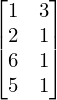

In [17]:
A = Matrix([[1, 3], [2, 1], [6, 1], [5, 1]])
A

In [18]:
A.nullspace()

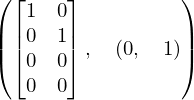

In [19]:
A.rref() # Just to show the reduced row echelon form

### The case of full row rank, i.e. $\text{rank}\left(A\right)=m$

Here, every row has a pivot.  For which $\underline{b}$ will the the set be solvable?  For ALL $\underline{b}$.  How many free variables?  We are left with $n-\text{rank}\left(A\right)$ or $n-m$ free variables.

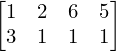

In [20]:
A2 = A.transpose() # Creating a new matrix, which is the transpose of A above (just as an example)
A2

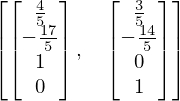

In [21]:
A2.nullspace() # Showing the two nullspace solutions

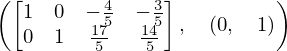

In [22]:
A2.rref()

### The case of full (row and column) rank, i.e. $\text{rank}\left(A\right)=m=n$

Let's do an example.

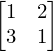

In [23]:
A = Matrix([[1, 2], [3, 1]])
A

In [24]:
A.nullspace() # Only the zero vector

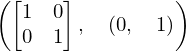

In [25]:
A.rref()

This is by definition an invertible matrix (which we will learn about later).

Let's look at an non-invertible matrix.  For this $2\times2$ matrix we will have one free variable (no pivot).

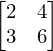

In [26]:
A = Matrix([[2, 4], [3, 6]])
A

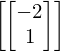

In [27]:
A.nullspace()

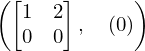

In [28]:
A.rref()